In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
#ambil berita detik
def getBeritaDetik(url):
    B = {}
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
  
    #ambil elemen berita
    B['judul'] = soup.find('h1', {'class' : 'detail_title'}).text.replace('\n', "").strip()
    B['tanggal'] = soup.find('div', {'class' : 'detail_date'}).text.replace('\n', "").strip()
    B['author'] = soup.find('h1', {'class' : 'detail_author'}).text.replace('\n', "").strip()
    berita = soup.find('div', {'class' : 'detail_body-text'})
    text_berita = berita.text
    #bersihkan isi berita 
    blah = berita.find_all('table')
    for x in blah:
        text_berita = text_berita.replace(x.text, '').replace('\n', "").strip()
        #print(x.text)
    B['berita'] = text_berita
    return(B)

In [ ]:
##
def getBeritaDetik(url):
    B = {}
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    #ambil elemen berita
    #Check apakah elemen tersebut ada sebelum mengaksesnya
    elemen_judul = soup.find('h1', {'class': 'detail__title'})
    B['judul'] = elemen_judul.text.replace('\n', "").strip() if elemen_judul else None

    elemen_tanggal = soup.find('div', {'class': 'detail__date'})
    B['tanggal'] = elemen_tanggal.text.replace('\n', "").strip() if elemen_tanggal else None

    elemen_author = soup.find('div', {'class': 'detail__author'})
    B['author'] = elemen_author.text.replace('\n', "").strip() if elemen_author else None

    berita = soup.find('div', {'class' : 'detail__body-text'})

    # Check berita elemen jika ditemukan sebelum akses text
    if berita:
        text_berita = berita.text
        #bersihkan isi berita
        blah = berita.find_all('table')
        for x in blah:
            text_berita = text_berita.replace(x.text, '').replace('\n', "")
            #print(x.text)
        B['berita'] = text_berita
    else:
        print("Berita element not found!")
        B['berita'] = None

    return(B)

In [7]:
getBeritaDetik('https://food.detik.com/info-kuliner/d-7638377/penjual-pisang-goreng-ini-batal-pensiun-karena-usahanya-diambil-alih-saingannya')

{'judul': 'Penjual Pisang Goreng Ini Batal Pensiun Karena Usahanya Diambil Alih Saingannya',
 'tanggal': 'Kamis, 14 Nov 2024 19:00 WIB',
 'author': 'Sonia Basoni  -                                                 detikFood',
 'berita': 'Jakarta - Penjual pisang goreng ini batal pensiun. gegara ia tahu bisnis pisang goreng legendarisnya diambil alih oleh saingannya sendiri.Di Singapura banyak penjual makanan legendaris yang sudah berusia lanjut. Beberapa dari mereka memutuskan untuk pensiun karena berbagai alasan. Mulai dari pasangan yang sudah tiada, kondisi kesehatan yang menurun sampai memutuskan untuk menjual usaha mereka ke orang baru.Seperti yang dilakukan oleh pemilik gerai pisang goreng legendaris bernama Million Star Fried Banana. Gerai pisang goreng ini selama puluhan tahun berjualan di pujasera Changi Village Hawker di unit #10-49, akan tetapi pada tahun 2023, sang pemilik Chan Fook Chee meninggal dunia di usia 79 tahun.\rADVERTISEMENT\r\rSCROLL TO CONTINUE WITH CONTENT\rAkhi

In [16]:
#mengambil berita pertanggal
def indexBerita(tanggal, jumlah_halaman):
    daftar_berita = []
    halaman = 0
    for halaman in range (0, jumlah_halaman):
        halaman = halaman + 1
        base_url = 'https://news.detik.com/berita/indeks/' + str(halaman)+'?date='+tanggal
        #print(base_url)
        
        #request URL dan Beautiful Parser
        r = requests.get(base_url)
        soup = BeautifulSoup(r.text, 'html.parser')

        berita_container = soup.find('div', {'id' : 'indeks-container'})
        berita = berita_container.find_all('article')

        for item in berita:
            x = item.find('a', href = True)
            berita = getBeritaDetik(x['href'])
            daftar_berita.append(berita)
    return daftar_berita

In [17]:
tanggal = '11/14/2024'
jumlah_halaman = 5
list_berita = indexBerita(tanggal, jumlah_halaman)

In [13]:
df = pd.DataFrame(list_berita)
#print(df.columns)
df.head()

,judul,tanggal,author,berita
0,6 Orang Terluka Imbas Kebakaran Pabrik Pengola...,"Kamis, 14 Nov 2024 23:45 WIB",Muchamad Sholihin - detikNews,Bogor - Kebakaran pabrik pengolahan limbah di ...
1,Legislator Soroti Pelantikan 305 Pejabat DKI E...,"Kamis, 14 Nov 2024 23:36 WIB",Mega Putra Ratya - detikNews,Jakarta - Penjabat (Pj) Gubernur DKI Jakarta T...
2,Polisi Alami Luka Tembak Akibat Diserang Pelak...,"Kamis, 14 Nov 2024 23:32 WIB",Mei Amelia R - detikNews,Jakarta - Aksi pencurian motor di kawasan Ceng...
3,"RIDO Teken Pakta Integritas, Fahira Idris: Teg...","Kamis, 14 Nov 2024 23:15 WIB",Jihaan Khoirunnisaa - detikNews,Jakarta - Pasangan calon gubernur-wakil gubern...
4,Fahira Idris Sambut Baik Pasangan RIDO Mau Lep...,"Kamis, 14 Nov 2024 23:05 WIB",Jihaan Khoirunnisaa - detikNews,Jakarta - Pasangan Ridwan Kamil-Suswono (RIDO)...


In [14]:
df.shape

(20, 4)

In [23]:
df_berita = pd.read_excel(r'dataset\berita_detik.xlsx')

In [24]:
df_berita.head()

,judul,tanggal,author,berita
0,Andy Bacok Ibu dan Anak hingga Tewas di Suraba...,"Jumat, 15 Nov 2024 14:20 WIB",Aprilia Devi - detikNews,Surabaya - Polisi mengungkap motif Andy Surotr...
1,Kejagung Usut Dugaan Ayah dan Ibu Ronald Tannu...,"Jumat, 15 Nov 2024 14:16 WIB",Dwi Rahmawati - detikNews,Jakarta - Kejaksaan Agung (Kejagung) mendalami...
2,"Prabowo di KTT APEC: Teknologi Bawa Kemajuan, ...","Jumat, 15 Nov 2024 14:15 WIB",Isal Mawardi - detikNews,Lima - Presiden Prabowo Subianto menghadiri Ko...
3,Menteri PPMI dan Menhub Kerja Sama Lindungi Pe...,"Jumat, 15 Nov 2024 14:15 WIB",Rifka Amalia - detikNews,Jakarta - Menteri Perhubungan (Menhub) Dudy Pu...
4,Kronologi Maling Motor Penembak Polisi Dibekuk...,"Jumat, 15 Nov 2024 14:10 WIB",Kurniawan Fadilah - detikNews,Jakarta - Polres Metro Tangerang Kota menangka...


In [ ]:
# keywords berita politik
keywords_politik = ['Presiden', 'Menteri', 'KTT', 'Partai', 'Parlemen', 'Kebijakan', 
                    'Pemilu', 'Pilpres', 'DPR', 'Pemerintah', 'Kabinet', 'DPRD', 'Gubernur' , 'Bupati', 'Wali Kota'
                    'Lembaga', 'Komisi', 'Mahkamah', 'Otoritas', 'Kampanye', 'Debat', 'Sidang', 'Legislasi', 'Pilkada'
                    'Pemilihan', 'Undang-Undang', 'Perppu' ,'Politik', 'Musyawarah'
                    ]
                    

# menentukan jenis berita
def jenis_berita(judul, isi):
    teks = (judul + " " + isi).lower()
    if any(keyword.lower() in teks for keyword in keywords_politik):
        return 'Politik'
    else:
        return 'Non-Politik'

# kolom jenis_berita
df_berita['jenis_berita'] = df_berita.apply(lambda x: jenis_berita(x['judul'], x['berita']), axis=1)

df_berita.head()

### Merge dataset

In [3]:
# Assuming the datasets are already loaded into the respective DataFrames
berita_detik_10 = pd.read_excel(r'dataset\berita_detik_10.xlsx')
berita_detik_11 = pd.read_excel(r'dataset\berita_detik_11.xlsx')
berita_detik_12 = pd.read_excel(r'dataset\berita_detik_12.xlsx')
berita_detik_13 = pd.read_excel(r'dataset\berita_detik_13.xlsx')
berita_detik_14 = pd.read_excel(r'dataset\berita_detik_14.xlsx')
berita_detik_15 = pd.read_excel(r'dataset\berita_detik_15.xlsx')

# Merge the datasets
merged_df = pd.concat([berita_detik_10, berita_detik_11, berita_detik_12, berita_detik_13, berita_detik_14, berita_detik_15], ignore_index=True)

# Convert the 'tanggal' column to datetime format
#merged_df['tanggal'] = pd.to_datetime(merged_df['tanggal'], format='%m/%d/%Y')

# Sort the merged dataframe based on the date
#merged_df = merged_df.sort_values(by='tanggal')

# Display the first few rows of the merged dataframe
merged_df.head()

,judul,tanggal,author,berita
0,Air Selokan Sempat Meluap ke Jalanan di Tamans...,"Minggu, 10 Nov 2024 23:44 WIB",Muchamad Sholihin - detikNews,Bogor - Hujan deras mengakibatkan air selokan ...
1,"Di Depan Pengusaha China, Prabowo: Kerja Sama ...","Minggu, 10 Nov 2024 23:10 WIB",Isal Mawardi - detikNews,Beijing - Presiden Prabowo Subianto menghadiri...
2,Kata-kata Prabowo soal China Saat Bertemu Xi J...,"Minggu, 10 Nov 2024 22:29 WIB",Antara News - detikNews,Jakarta - Presiden Prabowo Subianto bertemu d...
3,Jasa Marga Evakuasi Papan Reklame yang Roboh d...,"Minggu, 10 Nov 2024 22:18 WIB",Isal Mawardi - detikNews,Jakarta - Sebuah papan reklame roboh dan menut...
4,Kodam I/BB Usut Motif 33 Oknum TNI Serang Warg...,"Minggu, 10 Nov 2024 21:59 WIB",Kartika Sari - detikNews,Deli Serdang - Sebanyak 33 oknum TNI menyerang...


In [4]:
merged_df.shape

(1059, 4)

In [4]:
berita_df = merged_df[['berita']]
berita_df.head()

,berita
0,Bogor - Hujan deras mengakibatkan air selokan ...
1,Beijing - Presiden Prabowo Subianto menghadiri...
2,Jakarta - Presiden Prabowo Subianto bertemu d...
3,Jakarta - Sebuah papan reklame roboh dan menut...
4,Deli Serdang - Sebanyak 33 oknum TNI menyerang...


In [7]:
berita_df.shape

(1059, 1)

In [7]:
berita_df[berita_df['berita'].str.contains('pela', case=False, na=False)]

,berita
4,Deli Serdang - Sebanyak 33 oknum TNI menyerang...
10,\n\n\nSemarang - Paslon Gubernur Jateng nomor...
12,Jakarta - Polda Metro Jaya menangkap dua orang...
16,Jakarta - Hujan deras disertai angin kencang m...
17,Jakarta - Gunawan 'Sadbor' bisa menghirup udar...
...,...
1049,Jakarta - Pusat Polisi Militer (Puspom) TNI me...
1050,Daftar Isi\r\t\t\t\t\t\t\tSejarah HUT Korps Ma...
1052,Bogor - Seorang wanita berusia 28 tahun bikin...
1053,Jakarta - Komisi Perlindungan Anak Indonesia ...


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming X and y are your features and labels
X = sorted_df['berita']
y = sorted_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical data using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test, y_pred))

In [8]:
# Daftar kata kunci untuk kategori politik
political_keywords = [
    "politik","presiden", "dpr", "mpr", "pemilu", "pilpres", "pilkada",
    "kampanye", "debat", "kebijakan", "undang-undang", "perppu",
    "koalisi", "oposisi", "diplomasi", "hubungan bilateral",
    "partai", "demonstrasi", "unjuk rasa", "g20", "asean",
    "amerika", "china", "rusia", "xi jinping", "joe biden",
    "menteri", "ktt", "partai", "parlemen", "kebijakan", 
    "pemerintah", "kabinet", "dprd", "gubernur" , "bupati", "wali kota"
    "lembaga", "komisi", "mahkamah", "otoritas", "sidang", "legislasi", 
    "pemilihan", "musyawarah"
]


# Fungsi untuk menentukan label
def jenis_berita(text):
    text_lower = text.lower()
    for keyword in political_keywords:
        if keyword in text_lower:
            return "politik"
    return "non-politik"

# Terapkan ke kolom berita
berita_df['label'] = berita_df['berita'].apply(jenis_berita)

# Simpan hasil ke file baru
berita_df.to_excel("dataset/labeled_berita.xlsx", index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_16488\321003412.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berita_df['label'] = berita_df['berita'].apply(jenis_berita)


In [23]:
df = pd.read_excel('dataset/labeled_berita.xlsx')
df

,berita,label
0,Bogor - Hujan deras mengakibatkan air selokan ...,non-politik
1,Beijing - Presiden Prabowo Subianto menghadiri...,politik
2,Jakarta - Presiden Prabowo Subianto bertemu d...,politik
3,Jakarta - Sebuah papan reklame roboh dan menut...,non-politik
4,Deli Serdang - Sebanyak 33 oknum TNI menyerang...,non-politik
...,...,...
1054,Jakarta - Pihak Madrasah Ibtidaiyah (MI) Banyu...,non-politik
1055,"Jakarta - Gempa berkekuatan magnitudo (M) 5,3 ...",non-politik
1056,"Jakarta - Gempa berkekuatan magnitudo (M) 4,6 ...",non-politik
1057,"Jakarta - Ibu dan anak di Sukomanunggal, Surab...",non-politik


In [10]:
df.label.value_counts()

label
politik        725
non-politik    334
Name: count, dtype: int64

Bagian 2: Pra-Pemrosesan Teks (Text Pre-processing) (Poin 20) 
1. Lakukan pra-pemrosesan teks berikut:
 - Tokenisasi.
 - Penghapusan stopwords.
 - Stemming.
 - Lowercasing dengan mengubah semua teks menjadi huruf kecil.
 - Hapus tanda baca dan karakter khusus.
2. Berikan kode untuk pra-pemrosesan dan tunjukkan contoh teks sebelum dan sesudah pra-pemrosesan.

In [9]:
features = df['berita']
labels = df['label']

In [12]:
import re
import nltk 

In [30]:

# Define a custom stopword list (basic Indonesian stopwords)
stop_words_custom = {
    "yang", "di", "dan", "ke", "dari", "ini", "itu", "dengan", "pada", "untuk",
    "adalah", "juga", "sebagai", "oleh", "atau", "karena", "tersebut", "lebih",
    "dalam", "tidak", "akan", "dapat", "sudah", "bisa", "hanya", "kita", "saja",
    "ada", "mereka", "selain", "terjadi", "sehingga", "tersebut", "jadi", "saat",
    "ia", "sementara", "saat", "harus", "sebelum", "setelah", "sekitar", "namun",
    "bagaimana", "dimana", "siapa", "apa", "berapa", "kemudian", "sekarang", "jika",
    "akan", "telah", "masih", "bahwa", "apakah", "mengapa", "maka", "yaitu", "agar",
    "advertisement", "content", "saya", "dia", "semua", "kami", "kalian", "kita", "anda",
    "aku", "kau", "diri", "sendiri", "orang", "tempat", "waktu", "tahun", "bulan", "hari", 
    "minggu", "continue", "content","scroll", "belum", "ingin", "luar", "biasa", "biasanya",
    "ke",  "sa", "satu", "hingga", "seperti", "serta", "hal", "baik", "lain", "paling",
    "to", "with", "para", "ya", "tapi", "kalau", "tak"
}

# Define a simple stemming function
def simple_stemmer(word):
    suffixes = ['lah', 'kah', 'ku', 'mu', 'nya', 'pun']
    for suffix in suffixes:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

# Define a text preprocessing function
def preprocess_text_custom(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Substituting multiple spaces with single space
    #text = re.sub(r'\s+', ' ', text, flags=re.I)
    # remove all single characters
    text= re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    #Tokenize by splitting
    tokens = text.split()
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words_custom]
    # Apply stemming
    #stemmed_tokens = [simple_stemmer(word) for word in filtered_tokens]
    # Rejoin tokens
    return ' '.join(filtered_tokens)

df['berita_preprocessed'] = df['berita'].apply(preprocess_text_custom)



In [16]:
df.head()

,berita,label,berita_preprocessed
0,Bogor - Hujan deras mengakibatkan air selokan ...,non-politik,bogor hujan deras mengakibatkan air selokan me...
1,Beijing - Presiden Prabowo Subianto menghadiri...,politik,beijing presiden prabowo subianto menghadiri p...
2,Jakarta - Presiden Prabowo Subianto bertemu d...,politik,jakarta presiden prabowo subianto berte presid...
3,Jakarta - Sebuah papan reklame roboh dan menut...,non-politik,jakarta sebuah papan reklame roboh menutup aks...
4,Deli Serdang - Sebanyak 33 oknum TNI menyerang...,non-politik,deli serdang sebanyak 33 oknum tni menyerang d...


Bagian 3: Rekayasa Fitur (Feature Engineering) (Poin 10) 
Terapkan berbagai teknik ekstraksi fitur pada data teks yang sudah Anda kumpulkan dan terapkan rekayasa fitur berikut:
- TF-IDF (Term Frequency-Inverse Document Frequency): Jelaskan konsep dan buat representasi TF-IDF.
- Word2Vec: Jelaskan konsep dan buat embedding kata menggunakan Word2Vec.

In [25]:
#pustaka satrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords_indonesia = factory.get_stop_words()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=2000, 
    min_df=10, 
    max_df=0.8, 
    stop_words=stopwords_indonesia
)

processed_features = vectorizer.fit_transform(processed_features).toarray()


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the preprocessed text
texts = df['berita_preprocessed']

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2500, min_df=10,
                                    max_df=0.8, stop_words=stopwords_indonesia
                                    )  # Limit to top 1000 features for simplicity

# Fit and transform the texts
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# Convert to a DataFrame for better visualization
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Display the first few rows of the TF-IDF representation
#import ace_tools as tools; tools.display_dataframe_to_user(name="TF-IDF Representation of Preprocessed News Data", dataframe=tfidf_df)


In [27]:
tfidf_df

,02,10,100,1000,1011,10112024,11,1111,11112024,116,...,xi,xiii,yakin,yasin,yogyakarta,youtube,yudhoyono,yusuf,zaman,zona
0,0.0,0.000000,0.0,0.0,0.0,0.153650,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.232186,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.066891,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.053726,0.000000,0.0,0.0,0.0,...,0.495070,0.0,0.055872,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.047578,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1055,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1056,0.0,0.099220,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1057,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


## Konsep Word2Vec
Word2Vec adalah teknik embedding kata yang mengubah kata-kata menjadi representasi vektor numerik. Tidak seperti TF-IDF yang berbasis frekuensi, Word2Vec mempertimbangkan konteks kata dalam teks untuk menghasilkan vektor yang memiliki makna semantik.

Pendekatan Word2Vec:
1. Continuous Bag of Words (CBOW):
Memprediksi kata berdasarkan kata-kata tetangganya (konteks).
Misalnya, untuk "Saya ___ ke sekolah", model memprediksi kata yang hilang seperti "pergi".
Skip-gram:

2. Memprediksi konteks berdasarkan kata tengah.
Misalnya, untuk kata "pergi", model memprediksi kata-kata yang mungkin ada di sekitarnya seperti "Saya" dan "ke".
Word2Vec menghasilkan vektor dengan dimensi tetap (misalnya, 100 atau 300 dimensi) yang menyimpan hubungan semantik antara kata-kata. Kata-kata dengan makna serupa akan memiliki vektor yang lebih dekat (cosine similarity lebih tinggi).

In [33]:
from gensim.models import Word2Vec
import nltk

nltk.download('punkt')

# Tokenize the preprocessed text
tokenized_texts = [nltk.word_tokenize(text) for text in df['berita_preprocessed']]

# Create the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
word2vec_model.save("word2vec_model.model")

# Example: Get the embedding for a specific word
word_embedding = word2vec_model.wv['presiden']
print(word_embedding)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[-0.02413216 -0.05180907  2.4312327   2.6746025  -1.3140744  -2.1991062
  0.58382624  1.9007239  -1.5274752  -0.0114699   0.5952132  -1.6194949
 -1.3287959   0.13673067 -0.20946822 -0.4623851  -0.547817   -0.604519
  0.2788256  -1.8030689  -0.5640638   2.1103983   0.3749793  -2.39771
 -1.3536602   1.5148087  -1.3184056   0.8029377  -1.6856306   0.08687321
  0.5206536  -0.41757932  0.5569678   0.28899327 -0.41483375  1.9559418
  1.0474237  -0.8409419  -1.2850221  -0.8423152   3.226258   -2.6829965
 -0.7892674   1.817837    1.3161386  -2.469621   -3.093562   -1.5959369
  1.2875222  -0.21798363 -0.6042781  -1.1162935   1.3058027   0.47212937
 -1.4228746   0.6439701   1.1929612   0.23752007 -0.47788268  0.60234976
 -0.31263235 -0.5597449  -1.2719918   0.12127424 -0.13093328  0.60479003
 -0.07399168  3.0295844  -1.0149854   0.35545814 -2.49917    -0.8710356
  1.7123457   1.070533    0.48499846  2.2585914   1.094385   -0.23901492
  0.2888223   0.46772045 -2.2963367  -0.29667115 -0.8258881   

Bagian 4: Analisis Data Eksploratif dan Visualisasi (Poin 20) 
1. Lakukan analisis data eksploratif pada data teks.
Gunakan word clouds untuk memvisualisasikan kata-kata yang paling sering muncul.
Plot distribusi panjang teks (misalnya, jumlah kata per dokumen).
Visualisasikan frekuensi dari kata-kata teratas menggunakan bar plot.
2. Berikan kode dan visualisasi EDA.

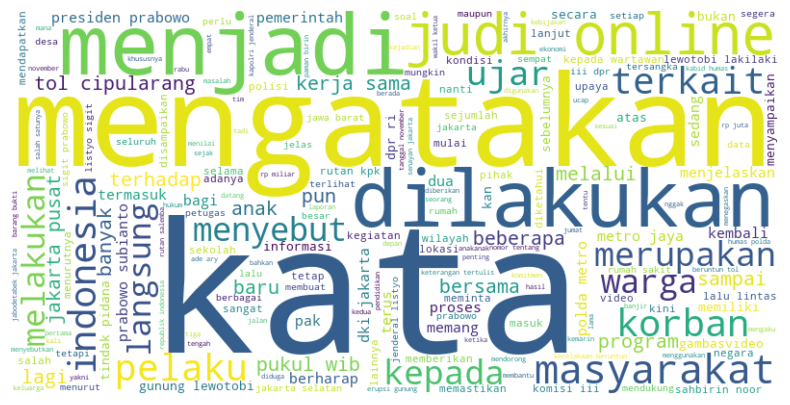

In [34]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Gabungkan semua teks yang telah diproses menjadi satu string
all_text = ' '.join(df['berita_preprocessed'])

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Tampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

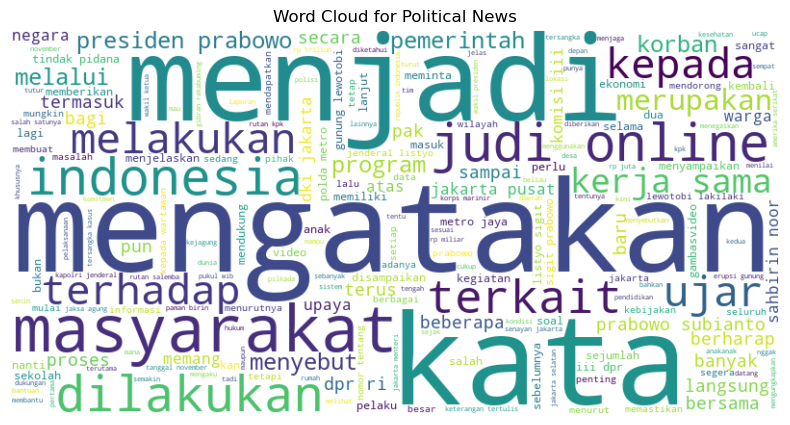

In [37]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Filter the dataframe for rows with label 'politik'
politik_texts = df[df['label'] == 'politik']['berita_preprocessed']

# Combine all texts into a single string
all_politik_text = ' '.join(politik_texts)

# Create the word cloud
wordcloud_politik = WordCloud(width=800, height=400, background_color='white').generate(all_politik_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_politik, interpolation='bilinear')
plt.title('Word Cloud for Political News')
plt.axis('off')
plt.show()

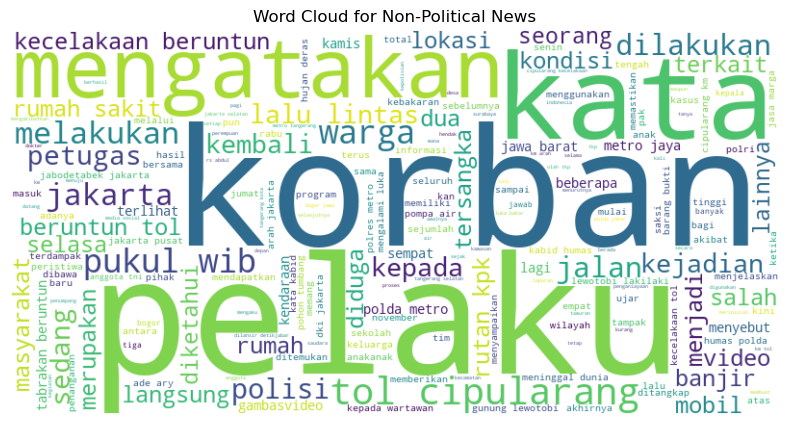

In [39]:
# Filter the dataframe for rows with label 'politik'
politik_texts = df[df['label'] == 'non-politik']['berita_preprocessed']

# Combine all texts into a single string
all_politik_text = ' '.join(politik_texts)

# Create the word cloud
wordcloud_politik = WordCloud(width=800, height=400, background_color='white').generate(all_politik_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_politik, interpolation='bilinear')
plt.title('Word Cloud for Non-Political News')
plt.axis('off')
plt.show()

karena mayoritas berita berisi politik maka kata yang sering muncul yaitu kata, mengatakan yang merupakan suatu kata opini pada pada berita politik.
Kata-kata seperti "menyebut", "mengatakan", dan "ujar" sering muncul dalam berita politik untuk mengutip pernyataan tokoh atau perwakilan resmi.

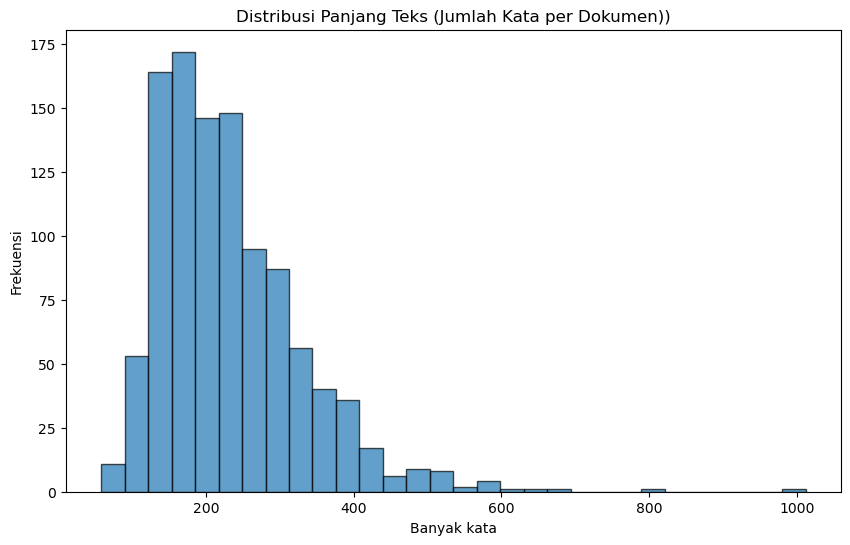

In [102]:
import matplotlib.pyplot as plt

# Calculate the length of each document
df['text_length'] = df['berita_preprocessed'].apply(lambda x: len(x.split()))

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribusi Panjang Teks (Jumlah Kata per Dokumen))')
plt.xlabel('Banyak kata')
plt.ylabel('Frekuensi')
plt.show()

- Puncak histogram terjadi sekitar 200–250 kata, menunjukkan bahwa sebagian besar dokumen memiliki jumlah kata dalam rentang ini.

- Frekuensi tertinggi mencapai hampir 175 dokumen pada kisaran ini.
- Dokumen dengan panjang di bawah 100 kata sangat sedikit, sehingga dataset ini sebagian besar terdiri dari dokumen dengan panjang sedang.

Bagian 5: Klasifikasi Teks
1. Buatlah model klasifikasi teks dari data yang Anda miliki.
2. Deskripsi:
Pisahkan data menjadi set pelatihan dan pengujian.
Latih classifier (misalnya, Naive Bayes, SVM, atau Logistic Regression) pada data pelatihan.
Evaluasi classifier pada data pengujian.
Laporkan hasilnya berupa accuracy, precision, recall, dan F1 score.
3. Berikan kode untuk pelatihan dan evaluasi model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Extract features and labels
X = tfidf_df
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Logistic Regression classifier
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Bagian 6: Soal Teori 
1. Berikan penjelasan Anda mengenai perbedaan antara text classification dengan text clustering?
2. Kapan text clustering dapat dilakukan pada data teks? Jelaskan situasi atau kondisi di mana teknik ini bermanfaat dan berikan contoh kasus penggunaannya. 
3. Jika menggunakan algoritma K-means untuk text clustering, bagaimana cara menentukan jumlah klaster optimal? Jelaskan dua metode yang umum digunakan untuk menentukan jumlah klaster optimal.

Jawaban:
1. text classification berfokus pada pengklasifikasian teks ke dalam kategori yang telah ditentukan, sementara text clustering berfokus pada pengelompokan teks berdasarkan kesamaan tanpa kategori yang sudah ada.
2. Text clustering sangat berguna dalam situasi di mana Anda memiliki kumpulan data teks yang besar dan ingin menemukan pola atau kelompok serupa tanpa mengetahui kategori atau label terlebih dahulu. Teknik ini bermanfaat dalam kondisi berikut:
- Ketika  tidak memiliki label data
- Exploratory Data Analysis (EDA)
- Menemukan pola tersembunyi: Jika ingin menemukan pola atau grup yang mungkin tidak terlihat langsung dalam data teks. </n>

contoh: pengelompokan Artikel Berita: ketika memiliki kumpulan besar artikel berita dan ingin menemukan topik utama yang dibahas dalam artikel-artikel tersebut, misalnya, apakah artikel tersebut membahas politik, olahraga, atau hiburan, tanpa label yang sudah ditentukan sebelumnya.

Secara keseluruhan, text clustering sangat berguna ketika Anda ingin mengeksplorasi, mengorganisir, atau memahami data teks yang besar tanpa menggunakan informasi kategori yang sudah ada.

3. 
a. Metode Elbow 
- Metode ini menganalisis Total Within-Cluster Sum of Squares (WCSS), yaitu jumlah total jarak kuadrat setiap data dalam klaster terhadap pusat klasternya.
- WCSS dihitung untuk berbagai nilai 𝑘 (jumlah klaster).
- Tujuannya adalah menemukan titik "elbow", yaitu ketika penurunan WCSS mulai melambat secara signifikan, menunjukkan bahwa menambah klaster tidak lagi memberikan peningkatan signifikan dalam pemisahan klaster.

Langkah-langkah:

- Jalankan algoritma K-Means untuk berbagai nilai k (misalnya, 
k=1 hingga k=10).
- Hitung WCSS untuk setiap nilai k
- Plot k terhadap WCSS.
- Cari titik "elbow" pada plot, yaitu nilai k di mana WCSS mulai menurun dengan lebih lambat.

b. Metode Silhouette
- Metode ini menggunakan Silhouette Score, yaitu ukuran bagaimana suatu data berada dalam klaster yang benar dan seberapa baik dipisahkan dari klaster lain.
- Nilai Silhouette Score berkisar antara -1 hingga 1:
        - Nilai mendekati 1: Data berada dalam klaster yang tepat.
        - Nilai mendekati 0: Data berada di perbatasan antara dua klaster.
        - Nilai negatif: Data mungkin salah diklasifikasikan.
- Tujuannya adalah mencari k yang memberikan rata-rata Silhouette Score tertinggi.

Langkah-langkah:

    - Jalankan algoritma K-Means untuk berbagai nilai k.
    - Hitung rata-rata Silhouette Score untuk setiap nilai k.
    - Plot rata-rata Silhouette Score terhadap k.
    - Cari nilai k dengan Silhouette Score tertinggi.

Kesimpulan
- Gunakan Elbow Method untuk pendekatan yang cepat dan intuitif.
- Gunakan Silhouette Method untuk analisis yang lebih mendalam dengan mempertimbangkan kualitas pemisahan klaster.
- Dapat menggunakan kedua metode tersebut untuk saling memvalidasi hasil jumlah klaster optimal.
